In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
import gc

from tensorflow.nn import depth_to_space

from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv2D, UpSampling2D, BatchNormalization
from keras.layers import Activation, Add, Concatenate, ReLU
from keras.layers.core import Dropout, Activation, Flatten, Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, Callback

In [2]:
"""
from google.colab import drive
drive.mount("/content/drive")
"""

'\nfrom google.colab import drive\ndrive.mount("/content/drive")\n'

In [3]:
"""
!cp -r '/content/drive/MyDrive/crops.zipPro' '/content/'
!cp -r '/content/drive/MyDrive/val.zipPro' '/content/'
!cp -r '/content/drive/MyDrive/test.zipPro' '/content/'
"""

"\n!cp -r '/content/drive/MyDrive/crops.zipPro' '/content/'\n!cp -r '/content/drive/MyDrive/val.zipPro' '/content/'\n!cp -r '/content/drive/MyDrive/test.zipPro' '/content/'\n"

In [4]:
"""
!mv crops.zipPro crops.zip
!mv val.zipPro val.zip
!mv test.zipPro test.zip
"""

'\n!mv crops.zipPro crops.zip\n!mv val.zipPro val.zip\n!mv test.zipPro test.zip\n'

In [5]:
"""
!unzip -q crops.zip
!unzip -q val.zip
!unzip -q test.zip
"""

'\n!unzip -q crops.zip\n!unzip -q val.zip\n!unzip -q test.zip\n'

In [6]:
"""!rm crops.zip
!rm test.zip
!rm val.zip"""

'!rm crops.zip\n!rm test.zip\n!rm val.zip'

In [7]:
def createaDataSet_Outputs(names, data_type):
    images_ = []

    if (data_type == "crops"):
      dir = '/content/crops/'
    elif (data_type == "val"):
      dir = '/content/val/'
    elif (data_type == "test"):
      dir = '/content/test/'

    for i in range(len(names)):
        img = cv.imread(dir + names[i], 0)
        images_.append(img)
    
    images = np.array(images_)
    del images_
    gc.collect()
    
    print("Outputs created.")
    
    return images

In [8]:
def createaDataSet_Inputs(names, data_type):
    images_ = []

    if (data_type == "crops"):
      dir = '/content/crops/'
    elif (data_type == "val"):
      dir = '/content/val/'
    elif (data_type == "test"):
      dir = '/content/test/'

    for i in range(len(names)):
        img = cv.imread(dir + names[i], 0)
        img = cv.resize(img, (img.shape[0] // 3, img.shape[1] // 3), interpolation = cv.INTER_AREA)
        img = cv.resize(img, (img.shape[0] * 3, img.shape[1] * 3), interpolation = cv.INTER_CUBIC)
        images_.append(img)
    
    images = np.array(images_)
    del images_
    gc.collect()

    print("Inputs created.")
    
    return images

In [9]:
names = os.listdir("crops")
y = createaDataSet_Outputs(names, "crops")

names = os.listdir("crops")
x = createaDataSet_Inputs(names, "crops")

names = os.listdir("val")
vy = createaDataSet_Outputs(names, "val")

names = os.listdir("val")
vx = createaDataSet_Inputs(names, "val")

names = os.listdir("test")
tx = createaDataSet_Inputs(names, "test")
ty = createaDataSet_Outputs(names, "test")

print("train output shape:", y.shape)
print("train input shape:", x.shape)
print("val_x shape:", vx.shape)
print("val_y shape:", vy.shape)
print("test_x shape:", tx.shape)
print("test_y shape:", ty.shape)

Outputs created.
Inputs created.
Outputs created.
Inputs created.
Inputs created.
Outputs created.
train output shape: (1191, 480, 480)
train input shape: (1191, 480, 480)
val_x shape: (282, 480, 480)
val_y shape: (282, 480, 480)
test_x shape: (211, 480, 480)
test_y shape: (211, 480, 480)


In [10]:
X_train = x
y_train = y

val_x = vx
val_y = vy
test_x = tx
test_y = ty


"""print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("val_x: ", val_x.shape)
print("val_y: ", val_y.shape)
#print("test: ", test.shape)

print("\nX_train[0]: \n", X_train[0])
print("\ny_train[0]: \n", y_train[0])
print("\nval_x[0]: \n", val_x[0])
print("\nval_y[0]: \n", val_y[0])
#print("\ntest[0]: \n", test[0])"""

'print("X_train: ", X_train.shape)\nprint("y_train: ", y_train.shape)\nprint("val_x: ", val_x.shape)\nprint("val_y: ", val_y.shape)\n#print("test: ", test.shape)\n\nprint("\nX_train[0]: \n", X_train[0])\nprint("\ny_train[0]: \n", y_train[0])\nprint("\nval_x[0]: \n", val_x[0])\nprint("\nval_y[0]: \n", val_y[0])\n#print("\ntest[0]: \n", test[0])'

In [11]:
X_train = X_train.astype('float32')

del x
print(gc.collect())

y_train = y_train.astype('float32')

del y
print(gc.collect())

val_x = val_x.astype('float32')

del vx
print(gc.collect())

val_y = val_y.astype('float32')

del vy
print(gc.collect())

test_x = test_x.astype('float32')

test_y = test_y.astype('float32')

del tx, ty
print(gc.collect())

X_train /= 255
y_train /= 255
val_x /=  255
val_y /=  255
test_x /= 255
test_y /= 255

"""print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("val_x: ", val_x.shape)
print("val_y: ", val_y.shape)
#print("test: ", test.shape)

print("\nX_train[0]: \n", X_train[0])
print("\ny_train[0]: \n", y_train[0])
print("\nval_x[0]: \n", val_x[0])
print("\nval_y[0]: \n", val_y[0])
#print("\ntest[0]: \n", test[0])"""

100
0
0
0
0


'print("X_train: ", X_train.shape)\nprint("y_train: ", y_train.shape)\nprint("val_x: ", val_x.shape)\nprint("val_y: ", val_y.shape)\n#print("test: ", test.shape)\n\nprint("\nX_train[0]: \n", X_train[0])\nprint("\ny_train[0]: \n", y_train[0])\nprint("\nval_x[0]: \n", val_x[0])\nprint("\nval_y[0]: \n", val_y[0])\n#print("\ntest[0]: \n", test[0])'

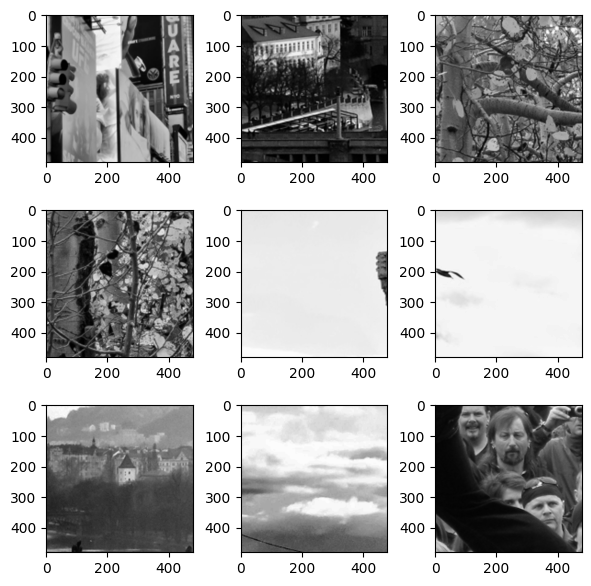

In [12]:
plt.figure(figsize=(6,6), dpi = 100)

for i in range(9):
  plt.subplot(3, 3, i + 1)
  num = random.randint(0, len(X_train) - 1)
  plt.imshow(X_train[num], cmap="gray")

plt.tight_layout()

In [13]:
print(gc.collect())

17839


125


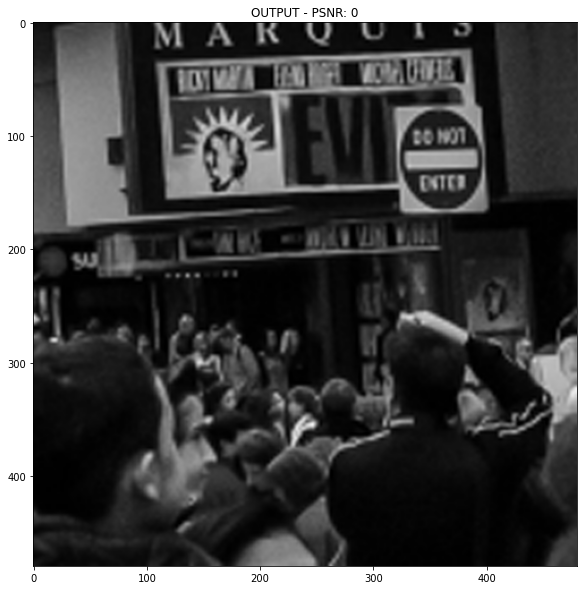

In [14]:
index = names.index('image3_6.jpg_Crop_79.jpg')

print(index)

plt.figure(figsize=(10,10))

plt.subplot(1, 1, 1)
plt.title("OUTPUT - PSNR: "  + str(0))
plt.imshow(cv.cvtColor(test_x[index], cv.COLOR_BGR2RGB))

In [15]:
PSNR_history_of_test_image = []
similarity_history = []

class PSNR_Accuracy(Callback):
    def __init__(self):
        super(PSNR_Accuracy, self).__init__()
        self.index = index
        self.test_image = np.array(test_x[self.index], ndmin=3)
        self.bicubic_and_original = cv.PSNR(test_y[self.index], test_x[self.index])
        self.original_and_original = cv.PSNR(test_y[self.index], test_y[self.index])
        self.output_and_original = 0
        self.similarity = 0
        self.similarity_of_bicubic = self.bicubic_and_original / self.original_and_original

    def on_epoch_end(self, epoch, logs=None):
          pred = model.predict(self.test_image)

          self.output_and_original = cv.PSNR(test_y[self.index], pred[0])

          self.similarity = self.output_and_original / self.original_and_original;
          
          print("\nPSNR Value of Predicted Image: " + str(self.output_and_original) +
                "\nPSNR Value of Input Image: " + str(self.bicubic_and_original) + 
                "\nIntended PSNR Value for Predicted Image: " + str(self.original_and_original) + 
                "\n\nSimilarity between Predicted Image and Original Image: " + str(self.similarity) + 
                "\n                                Similarity of Bicubic: " + str(self.similarity_of_bicubic) + "\n")
          
          PSNR_history_of_test_image.append(self.output_and_original)
          similarity_history.append(self.similarity)

In [16]:
def residual_block(x, k_size, filter):
    
    x_shortcut = x

    fx = Conv2D(filter, kernel_size = k_size, activation = "relu", kernel_initializer = "Orthogonal", padding="same")(x)
    fx = BatchNormalization()(fx)
    fx = Conv2D(filter, kernel_size = k_size, kernel_initializer = "Orthogonal", padding="same")(fx)

    fx = Add()([fx, x_shortcut])
    fx = ReLU()(fx)

    return fx

In [17]:
inp = Input(shape=(None, None, 1))
x = Conv2D(128, (5, 5), activation = "relu", kernel_initializer = "Orthogonal", padding="same")(inp)
x = Conv2D(128, (3, 3), activation = "relu", kernel_initializer = "Orthogonal", padding="same")(x)
x = Conv2D(128, (1, 1), activation = "relu", kernel_initializer = "Orthogonal", padding="same")(x)
x = Conv2D(128, (3, 3), activation = "relu", kernel_initializer = "Orthogonal", padding="same")(x)
x = Conv2D(128, (5, 5), activation = "relu", kernel_initializer = "Orthogonal", padding="same")(x)
x = Conv2D(128, (3, 3), activation = "relu", kernel_initializer = "Orthogonal", padding="same")(x)
x = Conv2D(128, (1, 1), activation = "relu", kernel_initializer = "Orthogonal", padding="same")(x)
x = Conv2D(1, (1, 1), activation = "relu", kernel_initializer = "Orthogonal", padding="same")(x)


model = Model(inputs = inp, outputs = x)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 128)   3328      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   16512     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   409728    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584

In [18]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [19]:
call_back=[EarlyStopping(monitor='val_loss', patience=10), PSNR_Accuracy()]
history = model.fit(X_train, y_train, epochs = 25, batch_size= 8, validation_data=(val_x, val_y), callbacks=call_back, verbose = 2) 

Epoch 1/25
149/149 - 375s - loss: 0.0412 - val_loss: 0.0017

PSNR Value of Predicted Image: 75.30761490965769
PSNR Value of Input Image: 74.58798741798616
Intended PSNR Value for Predicted Image: 361.20199909921956

Similarity between Predicted Image and Original Image: 0.2084916891309099
                                Similarity of Bicubic: 0.2064993759835127

Epoch 2/25
149/149 - 324s - loss: 0.0014 - val_loss: 0.0016

PSNR Value of Predicted Image: 75.62311973908002
PSNR Value of Input Image: 74.58798741798616
Intended PSNR Value for Predicted Image: 361.20199909921956

Similarity between Predicted Image and Original Image: 0.20936517496490076
                                Similarity of Bicubic: 0.2064993759835127

Epoch 3/25
149/149 - 325s - loss: 0.0013 - val_loss: 0.0015

PSNR Value of Predicted Image: 75.72005956052442
PSNR Value of Input Image: 74.58798741798616
Intended PSNR Value for Predicted Image: 361.20199909921956

Similarity between Predicted Image and Original Image

Mean Similarity:  0.20789742878151496
Similarity of Bicubic:  0.2064993759835127


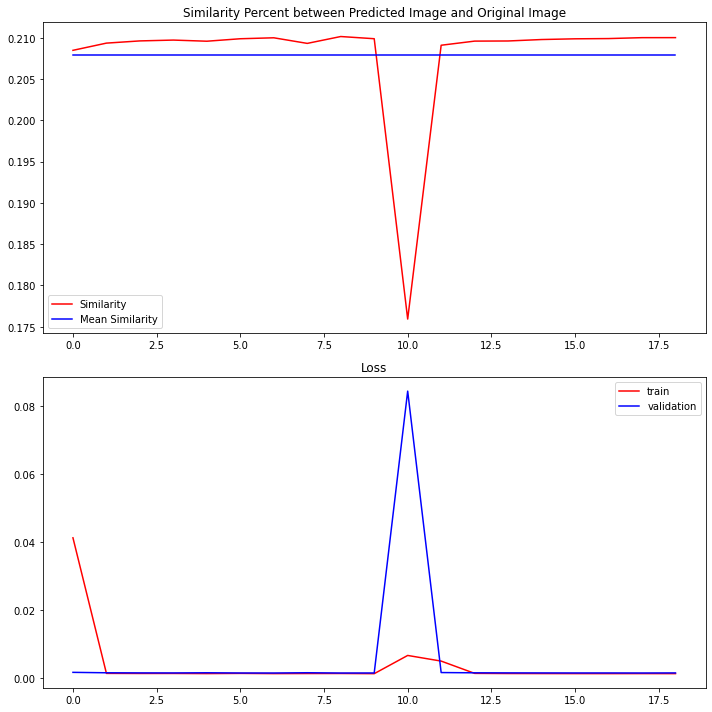

In [20]:
mean_similarity = [np.mean(similarity_history)] * len(similarity_history)
bicubic_and_original = cv.PSNR(test_y[index], test_x[index])
original_and_original = cv.PSNR(test_y[index], test_y[index])

print("Mean Similarity: ", mean_similarity[0])
print("Similarity of Bicubic: ", (bicubic_and_original / original_and_original))

plt.figure(figsize=(10,10))

plt.subplot(211)

plt.title("Similarity Percent between Predicted Image and Original Image")
plt.plot(similarity_history, color='r', label='Similarity')
plt.plot(mean_similarity, color='b', label='Mean Similarity'),
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color='r', label='train')
plt.plot(history.history["val_loss"], color='b', label='validation')
plt.legend(loc='best')

plt.tight_layout()
plt.show()



In [21]:
print(gc.collect())

11965


In [22]:
#model yapısı değiştirildi, interpolasyon şekli değiştirildi.
model.save('my_model_1191_v51_gray_PSNR.h5')

In [23]:
pred = model.predict(test_x)

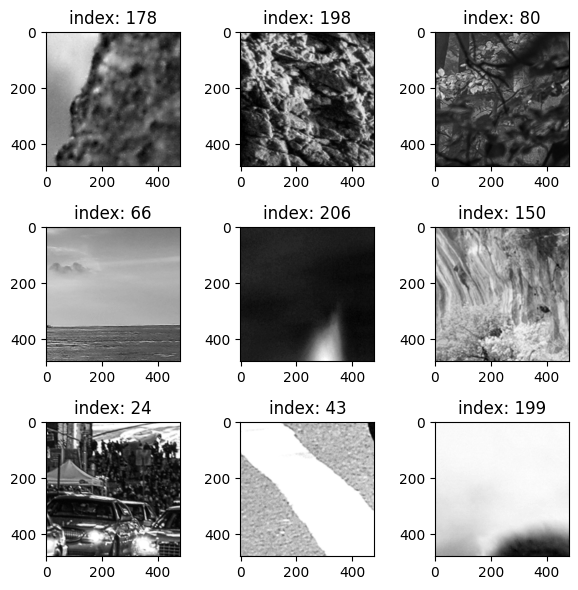

In [24]:
plt.figure(figsize=(6,6), dpi = 100)

arr = []

for i in range(9):
    plt.subplot(3, 3, i + 1)
    num = random.randint(0, len(test_x) - 1)
    plt.title("index: " + str(num))
    plt.imshow(test_x[num], cmap = "gray")

plt.tight_layout()

In [25]:
print(gc.collect())

16781


In [26]:
print(test_x[2].shape)
print(pred[2].shape)

(480, 480)
(480, 480, 1)


In [31]:
index = 125
# 176, 114, 173, 63, 112, 5, 67, 101, 194, 91, 98, 95
inter_area = cv.resize(test_y[index], (test_y[index].shape[0] // 3, test_y[index].shape[1] // 3), interpolation = cv.INTER_AREA)
inter_area = cv.resize(inter_area, (480, 480), interpolation = cv.INTER_AREA)

In [32]:
# psnr values

inter_area_and_original =  cv.PSNR(test_y[index], inter_area)
bicubic_and_original = cv.PSNR(test_y[index], test_x[index])
output_and_original = cv.PSNR(test_y[index], pred[index])
original_and_original = cv.PSNR(test_y[index], test_y[index])

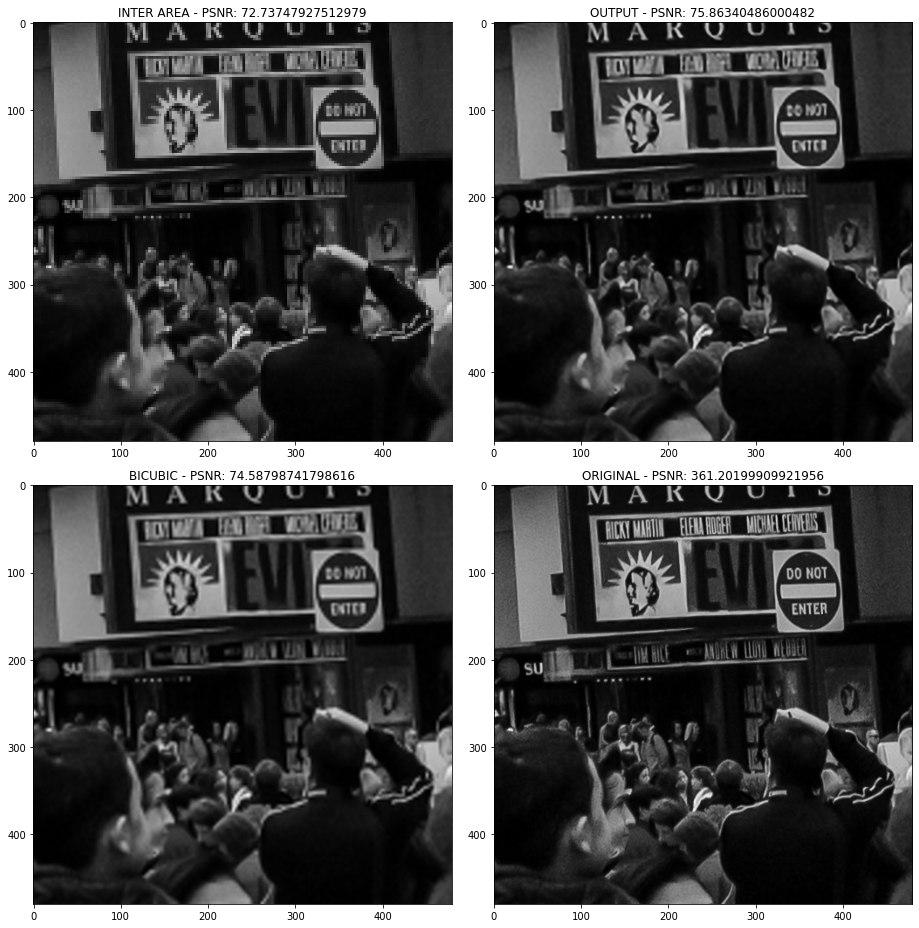

In [33]:
plt.figure(figsize=(13,13))

plt.subplot(2, 2, 1)
plt.title("INTER AREA - PSNR: " + str(inter_area_and_original))
plt.imshow(cv.cvtColor(inter_area, cv.COLOR_BGR2RGB))
plt.subplot(2, 2, 2)
plt.title("OUTPUT - PSNR: "  + str(output_and_original))
plt.imshow(cv.cvtColor(pred[index], cv.COLOR_BGR2RGB))

plt.subplot(2, 2, 3)
plt.title("BICUBIC - PSNR: "  + str(bicubic_and_original))
plt.imshow(cv.cvtColor(test_x[index], cv.COLOR_BGR2RGB))
plt.subplot(2, 2, 4)
plt.title("ORIGINAL - PSNR: "  + str(original_and_original))
plt.imshow(cv.cvtColor(test_y[index], cv.COLOR_BGR2RGB))

plt.tight_layout()

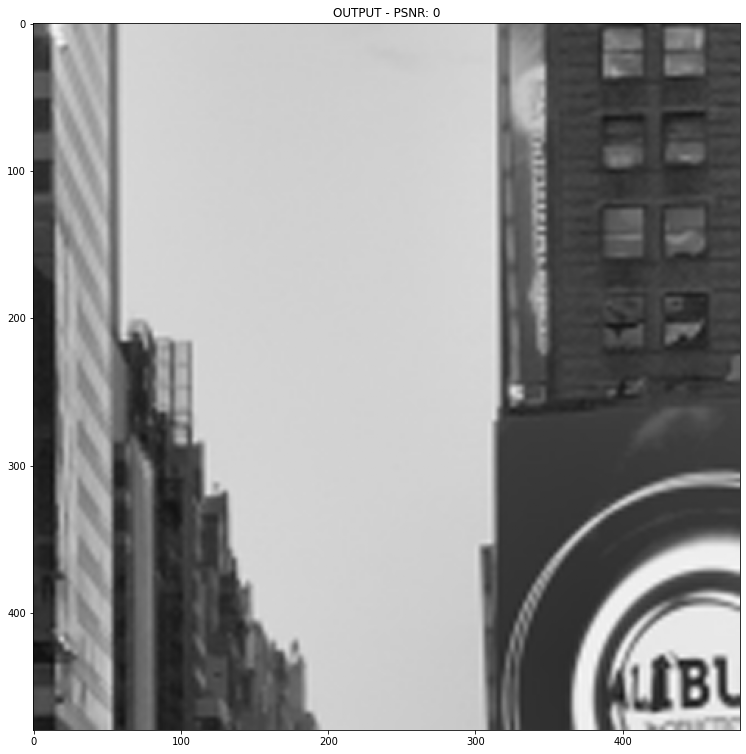

In [30]:
plt.figure(figsize=(13,13))

plt.subplot(1, 1, 1)
plt.title("OUTPUT - PSNR: "  + str(0))
plt.imshow(cv.cvtColor(test_x[index], cv.COLOR_BGR2RGB))